## Muat Libraries

In [1]:
import pandas as pd
from seaborn import pairplot
import mysql.connector as mysql

In [3]:
data = pd.read_csv("iris.csv")
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Sambungkan koneksi ke MySQL

In [4]:
koneksi = mysql.connect(host = "localhost",
                       user = "root",
                       password = "Rakhid@16")

## Buat DATABASE baru

In [5]:
cursor = koneksi.cursor()

cursor.execute("CREATE DATABASE iris_DB")

## Sambungkan ke DATABASE iris_DB

In [6]:
koneksi_baru = mysql.connect(host = "localhost",
                             database = "iris_DB",
                             user = "root",
                             password = "Rakhid@16")

## Cek koneksi

In [7]:
cursor = koneksi_baru.cursor()
cursor.execute("SELECT DATABASE();")
db_skrng = cursor.fetchone()
db_skrng

('iris_DB',)

## Buat TABLE baru

In [8]:
cursor.execute("CREATE TABLE iris "+
              "(sepal_length FLOAT(2,1) NOT NULL, " +
              "sepal_width FLOAT(2,1) NOT NULL, " +
              "petal_length FLOAT(2,1) NOT NULL, " +
              "petal_width FLOAT(2,1) NOT NULL, " +
              "species VARCHAR(17) NOT NULL)")

## Masukkan data dari .csv ke DATABASE

In [15]:
for i, baris in data.iterrows():
    sql_query = "INSERT INTO iris VALUES (%s, %s, %s, %s, %s)"
    cursor.execute(sql_query, tuple(baris))
    print(tuple(baris), "Telah dimasukkan")
    koneksi_baru.commit()

(5.1, 3.5, 1.4, 0.2, 'Iris-setosa') Telah dimasukkan
(4.9, 3.0, 1.4, 0.2, 'Iris-setosa') Telah dimasukkan
(4.7, 3.2, 1.3, 0.2, 'Iris-setosa') Telah dimasukkan
(4.6, 3.1, 1.5, 0.2, 'Iris-setosa') Telah dimasukkan
(5.0, 3.6, 1.4, 0.2, 'Iris-setosa') Telah dimasukkan
(5.4, 3.9, 1.7, 0.4, 'Iris-setosa') Telah dimasukkan
(4.6, 3.4, 1.4, 0.3, 'Iris-setosa') Telah dimasukkan
(5.0, 3.4, 1.5, 0.2, 'Iris-setosa') Telah dimasukkan
(4.4, 2.9, 1.4, 0.2, 'Iris-setosa') Telah dimasukkan
(4.9, 3.1, 1.5, 0.1, 'Iris-setosa') Telah dimasukkan
(5.4, 3.7, 1.5, 0.2, 'Iris-setosa') Telah dimasukkan
(4.8, 3.4, 1.6, 0.2, 'Iris-setosa') Telah dimasukkan
(4.8, 3.0, 1.4, 0.1, 'Iris-setosa') Telah dimasukkan
(4.3, 3.0, 1.1, 0.1, 'Iris-setosa') Telah dimasukkan
(5.8, 4.0, 1.2, 0.2, 'Iris-setosa') Telah dimasukkan
(5.7, 4.4, 1.5, 0.4, 'Iris-setosa') Telah dimasukkan
(5.4, 3.9, 1.3, 0.4, 'Iris-setosa') Telah dimasukkan
(5.1, 3.5, 1.4, 0.3, 'Iris-setosa') Telah dimasukkan
(5.7, 3.8, 1.7, 0.3, 'Iris-setosa') Telah dima

(6.2, 3.4, 5.4, 2.3, 'Iris-virginica') Telah dimasukkan
(5.9, 3.0, 5.1, 1.8, 'Iris-virginica') Telah dimasukkan


## Cek ketersediaan data pada DATABASE

In [17]:
cursor.execute("SELECT * FROM iris")

hasil = cursor.fetchall()
hasil

[(5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
 (4.9, 3.0, 1.4, 0.2, 'Iris-setosa'),
 (4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
 (4.6, 3.1, 1.5, 0.2, 'Iris-setosa'),
 (5.0, 3.6, 1.4, 0.2, 'Iris-setosa'),
 (5.4, 3.9, 1.7, 0.4, 'Iris-setosa'),
 (4.6, 3.4, 1.4, 0.3, 'Iris-setosa'),
 (5.0, 3.4, 1.5, 0.2, 'Iris-setosa'),
 (4.4, 2.9, 1.4, 0.2, 'Iris-setosa'),
 (4.9, 3.1, 1.5, 0.1, 'Iris-setosa'),
 (5.4, 3.7, 1.5, 0.2, 'Iris-setosa'),
 (4.8, 3.4, 1.6, 0.2, 'Iris-setosa'),
 (4.8, 3.0, 1.4, 0.1, 'Iris-setosa'),
 (4.3, 3.0, 1.1, 0.1, 'Iris-setosa'),
 (5.8, 4.0, 1.2, 0.2, 'Iris-setosa'),
 (5.7, 4.4, 1.5, 0.4, 'Iris-setosa'),
 (5.4, 3.9, 1.3, 0.4, 'Iris-setosa'),
 (5.1, 3.5, 1.4, 0.3, 'Iris-setosa'),
 (5.7, 3.8, 1.7, 0.3, 'Iris-setosa'),
 (5.1, 3.8, 1.5, 0.3, 'Iris-setosa'),
 (5.4, 3.4, 1.7, 0.2, 'Iris-setosa'),
 (5.1, 3.7, 1.5, 0.4, 'Iris-setosa'),
 (4.6, 3.6, 1.0, 0.2, 'Iris-setosa'),
 (5.1, 3.3, 1.7, 0.5, 'Iris-setosa'),
 (4.8, 3.4, 1.9, 0.2, 'Iris-setosa'),
 (5.0, 3.0, 1.6, 0.2, 'Iris-setosa'),
 (5.0, 3.4, 

In [18]:
data_dari_db = pd.DataFrame(columns = ["sepal_length",
                                      "sepal_width",
                                      "petal_lenght",
                                      "petal_width",
                                      "species"],
                           data = hasil)

data_dari_db

,sepal_length,sepal_width,petal_lenght,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Visualisasikan datanya

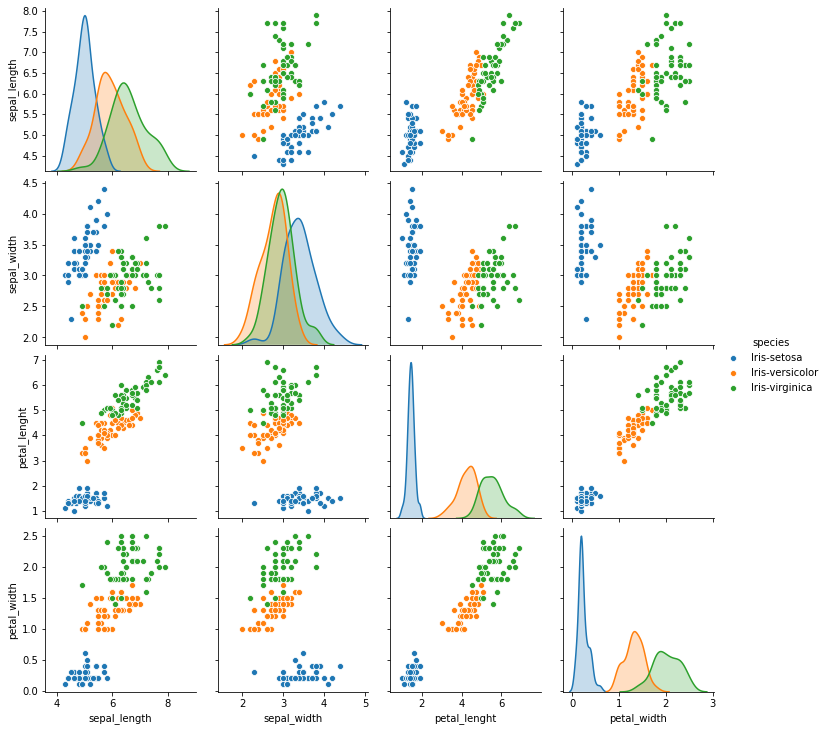

In [19]:
pairplot(data = data_dari_db, hue="species")